In [89]:
import pandas as pd
import numpy as np
import nltk
import glob
import io
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [3]:
contents = []
overalls = []
for filename in glob.iglob('./Review_Texts/*.dat', ):
#for filename in glob.iglob('./test_hotel/*.dat', ):
    with io.open(filename, 'r', encoding="utf8") as input_file:
        lines = input_file.readlines()
        
        for line in lines:
            #print(line)
            if '<Content>' in line:
                contents.append(line[9:].strip('\n'))
            if '<Overall>' in line:
                overalls.append(line[9:].strip('\n'))
print(contents[:1])
print(overalls[:1])

[u"Wonderful time- even with the snow! What a great experience! From the goldfish in the room (which my daughter loved) to the fact that the valet parking staff who put on my chains on for me it was fabulous. The staff was attentive and went above and beyond to make our stay enjoyable. Oh, and about the parking: the charge is about what you would pay at any garage or lot- and I bet they wouldn't help you out in the snow! "]
[u'5']


In [4]:
df = pd.DataFrame(list(map(list, zip(contents, overalls))))
columns = ['review', 'score']
df.columns = columns
df.review = df.review.str.lower()

In [5]:
#Assume that negative reviews have 0-1 score and positive have 4-5 score
def filter(user):
    score = int(user)
    if (score <2):     
        return 'neg'
    elif (score >=2 and score <4):
        return 'neutral'
    else:
        return 'pos'
    


In [6]:
df['category'] = df['score'].apply(filter)
df.head(-20)

,review,score,category
0,wonderful time- even with the snow! what a gre...,5,pos
1,"lovely hotel, unique decor, friendly front des...",4,pos
2,"nice hotel, expensive parking we got a good de...",4,pos
3,fabulous hotel location and service are great....,5,pos
4,"loved the monaco! staff was amazing, with a sm...",5,pos
5,"ok, but nothing special for the $$ they charge...",2,neutral
6,nice rooms but not a 4* experience the hotel m...,3,neutral
7,wonderful experience at the monaco we are seat...,5,pos
8,great hotel fantastic hotel. get the goldfish ...,5,pos
9,loved it location is fabulous. service couldn'...,4,pos


In [7]:
df['score'].unique()

array([u'5', u'4', u'2', u'3', u'1', u'0'], dtype=object)

In [8]:
df['score'].value_counts()

5    102010
4     76472
3     25262
2     19431
1     14570
0      2315
Name: score, dtype: int64

In [15]:
df['category'].value_counts()

pos        178482
neutral     44693
neg         16885
Name: category, dtype: int64

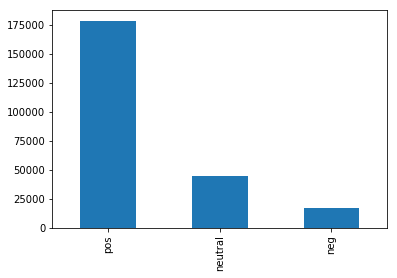

In [9]:
df.category.value_counts().plot(kind='bar')

In [10]:
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from nltk.classify import ClassifierI
from scipy import stats
from nltk.tokenize import word_tokenize


# Limiting # of positive reviews to 17K

In [96]:
short_pos = df.review[df['category'] == 'pos']
short_pos = short_pos[:17000]

In [97]:
len(short_pos.values)

17000

In [93]:
all_words = []
documents = []
bigrams = []
allowed_bigrams = [("JJ", "NN"), ("JJ", "NNS"), ("RB", "JJ"), ("RBR", "JJ"),
                  ("RBS", "JJ"), ("JJ", "JJ"), ("NN", "JJ"), ("NNS", "JJ"), 
                  ("RB", "VB"), ("RB", "VBD"), ("RB", "VBN"), ("RB", "VBG"),
                   ("RBR", "VB"), ("RBR", "VBD"), ("RBR", "VBN"), ("RBR", "VBG"),
                   ("RBS", "VB"), ("RBS", "VBD"), ("RBS", "VBN"), ("RBS", "VBG")]
allowed_word_types = ["J"]

#allowed_word_types = []
for p in short_pos.values:
    documents.append((p, 'pos'))
    words = word_tokenize(p)
    pos = nltk.pos_tag(words)
    #bigrams = [(words[n], words[n+1]) for n in range(1, len(words)-1)]
    for w in pos:
        if w[1][0] in allowed_word_types:
           
            all_words.append(w[0].lower())
            
len(documents)


16885

In [98]:
short_neg = df.review[df['category'] == 'neg']
len(short_neg)

16885

In [94]:
for p in short_neg.values:
    documents.append((p, 'neg'))
    words = word_tokenize(p)
    pos = nltk.pos_tag(words)
    #bigrams = [(words[n], words[n+1]) for n in range(1, len(words)-1)]
    for w in pos:
        if w[1][0] in allowed_word_types:
           
            all_words.append(w[0].lower())
            
len(documents)

33770

In [87]:
save_documents = open("documents.pickle","wb")
pickle.dump(documents, save_documents)
save_documents.close()
all_words = nltk.FreqDist(all_words)
word_features = list(all_words.keys())[:5000]
save_word_features = open("word_features5k.pickle","wb")
pickle.dump(word_features, save_word_features)
save_word_features.close()

In [99]:
len(documents)

33770

In [ ]:
def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

featuresets = [(find_features(rev), category) for (rev,
category) in documents[:20000]]
len(featuresets)



In [ ]:
random.shuffle(featuresets)
print(len(featuresets))
testing_set = featuresets[10000:]
training_set = featuresets[:10000]
classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Original Naive Bayes Algo accuracy percent:",
(nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

# 70-30 Test-Train split

In [16]:
X = df.review.values
y = df.category.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# TF-IDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df = 0.6,
                             stop_words='english',
                             use_idf=True)
X_train = vectorizer.fit_transform(X_train)
print("  Actual number of tfidf features: %d" % X_train.get_shape()[1])

  Actual number of tfidf features: 180189


# Latent Semantic Analysis (dimensionality reduction)

In [19]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

svd = TruncatedSVD(500)
lsa = make_pipeline(svd, Normalizer(copy=False))

# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train)

explained_variance = svd.explained_variance_ratio_.sum()
print("  Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

MemoryError: 

In [ ]:
X_test = vectorizer.transform(X_test)
X_test_lsa = lsa.transform(X_test)
print(y_test)

# Predicting score with Ordinary Least Squares Linear Regression

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(X_train_lsa, y_train)
print('Coefficients: \n', regr.coef_)

regr.score(X_test_lsa, y_test)

In [ ]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(X_train_lsa, y_train)
print('Coefficients: \n', regr.coef_)

reg.score(X_test_lsa, y_test)